In [1]:
import json
import numpy as np

# WICE-subclaim

In [3]:
with open('wice_true_or_false.json','w') as outfile:
    with open('WICE/dev.jsonl') as file:
        for line in file:
            data=json.loads(line)
            if data['label']=='supported' or data['label']=='not_supported':
                outfile.write(json.dumps(data)+"\n")

In [4]:
with open('wice_true_or_false.json','a') as outfile:
    with open('WICE/test.jsonl') as file:
        for line in file:
            data=json.loads(line)
            if data['label']=='not_supported':
                outfile.write(json.dumps(data)+"\n")

# WICE-claim

In [6]:
with open('wice_true_or_false1.json','w') as outfile:
    with open('WICE/claim/dev.jsonl') as file:
        for line in file:
            data=json.loads(line)
            if data['label']=='supported': #or data['label']=='not_supported':
                outfile.write(json.dumps(data)+"\n")

In [7]:
with open('wice_true_or_false1.json','a') as outfile:
    with open('WICE/claim/train.jsonl') as file:
        for line in file:
            data=json.loads(line)
            if data['label']=='supported':# or data['label']=='not_supported':
                outfile.write(json.dumps(data)+"\n")

In [8]:
with open('wice_true_or_false1.json','a') as outfile:
    with open('WICE/claim/test.jsonl') as file:
        for line in file:
            data=json.loads(line)
            if data['label']=='supported':# or data['label']=='not_supported':
                outfile.write(json.dumps(data)+"\n")

# temperature=0.1/0.5/0.9

In [2]:
num=251  # 250/254/251

In [5]:
t=0
f=0
t1=[]
f1=[]
n=0
with open('wice+0.9/detections_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t1.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f1.append(ref1)
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t1.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f1.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t1.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f1.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t1.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f1.append(ref1)
                            
        if flag==False:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

48 0.19123505976095617
201 0.8007968127490039
matched num= 502


In [6]:
t=0
f=0
t11=[]
f11=[]
n=0
with open('wice+0.9/detections_1_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t11.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f11.append(ref1)
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t11.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f11.append(ref1)
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t11.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f11.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t11.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f11.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

39 0.1553784860557769
224 0.8924302788844621
matched num= 502


In [7]:
t=0
f=0
t2=[]
f2=[]
n=0
with open('wice+0.9/combine/detections_2_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t2.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f2.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t2.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f2.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t2.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f2.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t2.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f2.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

75 0.29880478087649404
206 0.8207171314741036
matched num= 502


In [8]:
t=0
f=0
t22=[]
f22=[]
n=0
with open('wice+0.9/detections_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t22.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f22.append(ref1)
                    break
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
                        break
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t22.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f22.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t22.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f22.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)
t222=t22
f222=f22

41 0.16334661354581673
214 0.852589641434263
matched num= 502


In [9]:
t=0
f=0
t3=[]
f3=[]
n=0
with open('wice+0.9/detections_3.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t3.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f3.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t3.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f3.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t3.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f3.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t3.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f3.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

71 0.28286852589641437
196 0.7808764940239044
matched num= 502


In [10]:
t=0
f=0
t33=[]
f33=[]
n=0
with open('wice+0.9/combine/detections_3_3.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t33.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f33.append(ref1)
                    break
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t33.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f33.append(ref1)
                        break
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t33.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f33.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t33.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f33.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

74 0.2948207171314741
229 0.9123505976095617
matched num= 502


In [11]:
t=0
f=0
t4=[]
f4=[]
n=0
with open('wice+0.9/detections_4.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t4.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f4.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t4.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f4.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t4.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f4.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t4.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f4.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

38 0.15139442231075698
212 0.8446215139442231
matched num= 502


In [12]:
t=0
f=0
t44=[]
f44=[]
n=0
with open('wice+0.9/detections_4_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t44.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f44.append(ref1)
                    break
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t44.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f44.append(ref1)
                        break
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t44.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f44.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t44.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f44.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

44 0.1752988047808765
210 0.8366533864541833
matched num= 502


In [13]:
t=0
f=0
t5=[]
f5=[]
n=0
with open('wice+0.9/detections_5.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t5.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f5.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t5.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f5.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t5.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f5.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t5.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f5.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

40 0.1593625498007968
229 0.9123505976095617
matched num= 502


In [14]:
t=0
f=0
t55=[]
f55=[]
n=0
with open('wice+0.9/combine/detections_5_3.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t55.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f55.append(ref1)
                    break
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t55.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f55.append(ref1)
                        break
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t55.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f55.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t55.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f55.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

61 0.24302788844621515
217 0.8645418326693227
matched num= 502


In [15]:
t=0
f=0
t6=[]
f6=[]
n=0
with open('wice+0.9/combine/detections_6_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t6.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f6.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t6.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f6.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t6.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f6.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t6.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f6.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

59 0.2350597609561753
228 0.9083665338645418
matched num= 502


In [16]:
t=0
f=0
t66=[]
f66=[]
n=0
with open('wice+0.9/detections_6_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t66.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f66.append(ref1)
                    break
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t66.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f66.append(ref1)
                        break
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t66.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f66.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t66.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f66.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

48 0.19123505976095617
218 0.8685258964143426
matched num= 502


In [17]:
t=0
f=0
t7=[]
f7=[]
n=0
with open('wice+0.9/combine/detections_7_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        pre=n
        with open('wice+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if ref1.strip()==p1.strip()[:-1] or len(sentences1)>1 and len(sentences2)>1 and sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # hallucination
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t7.append(ref1)
                    else:# factual
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f7.append(ref1)
                    
        if flag==False:
            with open('wice+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    sub=ref1.strip().split('\"')
                    sub1=p1.strip()[:-1].split('\\\"')
                    if len(sub)>2 and len(sub1)>2 and sub[-2]==sub1[-2]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # hallucination
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t7.append(ref1)
                        else:# factual
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f7.append(ref1)
                        
                    if flag==False:
                        if len(sub)>2 and len(sub1)>2 and len(sub1[-2].split('\\u'))>1:
                            uni=sub1[-2].split('\\u')[-1][4:]
                            length=len(uni)
                            if sub[-2].strip()[-length:] == uni:
                                flag = True
                                n+=1
                                label=data1[0]['label']
                                if label == 'true': # hallucination
                                    if "here are no conflicting parts" in answer: # factual
                                        t+=1
                                    else:
                                        t7.append(ref1)
                                else:# factual
                                    if "here are no conflicting parts" in answer: # factual
                                        f+=1
                                    else:
                                        f7.append(ref1)
                               
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # hallucination
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t7.append(ref1)
                            else:# factual
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f7.append(ref1)
                            
        if n-pre!=1:
            print(p1)
print(num-t,(num-t)/num)
print(f,f/num)
print('matched num=',n)

53 0.21115537848605578
229 0.9123505976095617
matched num= 502


In [42]:
with open('detections_7_2.jsonl','w') as twofile:
    with open('detections_7.jsonl') as file:
        for line in file:
            data = json.loads(line)
            answer = data[1]['choices'][0]['message']['content']
            question = data[0]['messages'][0]['content']
            p1 = question.split('P1: \"')[1].split('P2: ')[0]
            if p1 in t777:
                twofile.write(json.dumps(data)+"\n")
            elif p1 in t7:
                print('xxx')
                with open('wice+0.9/detections_7.jsonl') as file1:
                    for line1 in file1:
                        data1 = json.loads(line1)
                        answer1 = data1[1]['choices'][0]['message']['content']
                        question1 = data1[0]['messages'][0]['content']
                        p11 = question1.split('P1: \"')[1].split('P2: ')[0]
                        if p1.strip()==p11.strip():
                            print('yyy')
                            twofile.write(json.dumps(data1)+"\n")
                            break
            else:
                twofile.write(json.dumps(data)+"\n")

xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy
xxx
yyy


In [32]:
tlist=[t1,t2,t3,t4,t5,t6,t7,t11,t22,t33,t44,t55,t66]
flist=[f1,f2,f3,f4,f5,f6,f7,f11,f22,f33,f44,f55,f66]
#      0   1  2  3  4  5  6  7   8   9   10  11  12
minV=0
for kk in range(13-12):
    for jj in range(kk+1,13-11):
        for ii in range(jj+1,13-10):
            for i in range(ii+1,13-9):
                for j in range(i+1,13-8):
                     for k in range(j+1,13-7):
                        for m in range(k+1,13-6):
                            for n in range(m+1,13-5):
                                for q in range(n+1,13-4):
                                    for w in range(q+1,13-3):
                                        for z in range(w+1,13-2):
                                            for y in range(z+1,13-1):
                                                for p in range(y+1,13):
                                                    a=tlist[kk]+tlist[jj]+tlist[ii]+tlist[i]+tlist[j]+tlist[k]+tlist[m]+tlist[n]+tlist[q]+tlist[w]+tlist[z]+tlist[y]+tlist[p]## 
                                                    res=set(a)
                                                    a=list(res)
                                                    aa=len(a)
                                                    a=flist[kk]+flist[jj]+flist[ii]+flist[i]+flist[j]+flist[k]+flist[m]+flist[n]+flist[q]+flist[w]+flist[z]+flist[y]+flist[p]## 
                                                    res=set(a)
                                                    a=list(res)
                                                    bb=len(a)
                                                    TN=(num-bb)/(num*2)
                                                    TP=aa/(num*2)
                                                    FN=(num-aa)/(num*2)
                                                    FP=bb/(num*2)
                                                    F1=2*TP/(2*TP+FP+FN)
                                                    if TN+TP>=minV:
                                                        print(kk,jj,ii,i,j,k,m)#,n,q,w,z,y,p)
                                                        print(TN+TP)
                                                        print(F1)
                                                        minV=TN+TP

0 1 2 3 4 5 6
0.549800796812749
0.6636904761904763


In [35]:
with open('wice+0.1/dataset_0.1.jsonl') as file1: 
    fnum=[]
    tnum=[]
    num=0
    for line1 in file1:
        data1 = json.loads(line1)
        q = data1[0]['messages'][0]['content']
        ref1 = q.split('Reference:')[-1]
        label=data1[0]['label']
        sub=ref1.strip().split('\"')
        num+=1
        if label == 'false': # factual
            num1=0
            for f in flist:
                if ref1 in f:
                    num1+=1
            fnum.append(num1)
            #print(num,num1)
        else:
            num2=0
            for t in tlist:
                if ref1 in t:
                    num2+=1
            tnum.append(num2)
            #print(num,num2)
    print(num)
    print(np.mean(fnum))
    print(np.mean(tnum))

500
0.908
2.196


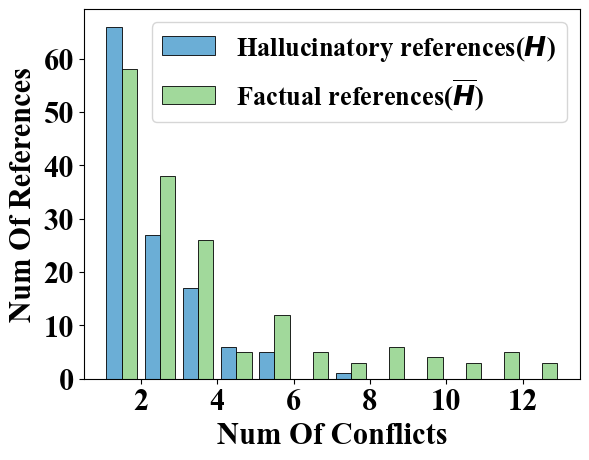

In [75]:
import matplotlib.pyplot as plt
bins=np.arange(1,14)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams["font.weight"] = "bold"
cmap = plt.get_cmap('tab20c')
plt.hist([fnum, tnum], bins, label=['Hallucinatory references($H$)', 'Factual references($\overline{H}$)'],color=cmap([1,10]),edgecolor='black',linewidth=0.6)
plt.legend(fontsize=19)
plt.xticks(size=22)
plt.yticks(fontsize=22)
plt.ylabel('Num Of References',size=22,weight = 'bold') 
plt.xlabel('Num Of Conflicts',size=22,weight = 'bold') 
plt.savefig('imgs/conflicts.pdf',dpi=600,format='pdf', bbox_inches='tight')

In [48]:
a=t2+t3+t6+t7+t33+t55+t66
res=set(a)
a=list(res)
print(len(a))
aa=len(a)
print(len(a)/num)

200
0.796812749003984


In [49]:
a=f2+f3+f6+f7+f33+f55+f66
res=set(a)
a=list(res)
print(len(a))
bb=len(a)
print((num-len(a))/num)

134
0.46613545816733065


In [50]:
all_num=num*2
# FN:
FN=(num-aa)/all_num
print('FN',FN)
# FP:
FP=bb/all_num
print('FP',FP)
# TN:
TN=(num-bb)/all_num
print('TN',TN)
# TP:
TP=aa/all_num
print('TP',TP)

FN 0.10159362549800798
FP 0.26693227091633465
TN 0.23306772908366533
TP 0.398406374501992


In [51]:
Accuracy=TN+TP
print(Accuracy)
Precision=TP/(TP+FP)
print(Precision)
Recall=TP/(TP+FN)
print(Recall)
F1=2*TP/(2*TP+FP+FN)
print(F1)

0.6314741035856574
0.5988023952095808
0.796812749003984
0.6837606837606838
